## Importing the libraries

In [280]:
from __future__ import print_function    #adds compatibility to Python2
import pandas as pd
import numpy as np

In [281]:
#using the inline backend
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [282]:
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.1.3


In [283]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Importing the dataset

In [284]:
df_can = pd.read_excel("Canada.xlsx", sheet_name= "Canada by Citizenship", skiprows= range(20), skipfooter=2)

## Basic Operations and cleaning

In [285]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [286]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [287]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [288]:
df_can.shape

(195, 43)

## Clean the dataset to remove some columns which are not required

In [289]:
df_can.drop(['Type','Coverage','REG','AREA','DEV'], axis=1, inplace=True)

## Rename some columns 

In [290]:
df_can.rename(columns= {"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace=True)

In [291]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


## Adding the Total column

In [292]:
df_can["Total"]=df_can.sum(axis=1)

In [293]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

## Indexing the dataset

In [294]:
df_can.set_index("Country", inplace=True)

Opposite of the set_index() function is reset_index() function.

In [295]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [296]:
df_can.index.name=None

In [297]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [298]:
df_can.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=195)

## For consistency, ensure that all column labels of type string.

In [299]:
all(isinstance(column, str) for column in df_can.columns)

False

## Converting Integer Column names into Strings

In [300]:
df_can.columns= list(map(str, df_can.columns))

In [301]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [302]:
years= list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [303]:
# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

## Visualization using Box Plot

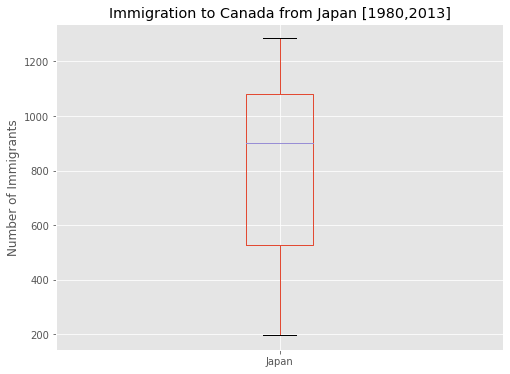

In [304]:
df_japan= df_can.loc[['Japan'],years].transpose()

df_japan.plot(kind='box', figsize=(8,6))

plt.title("Immigration to Canada from Japan [1980,2013]")
plt.ylabel("Number of Immigrants")

plt.show()

In [305]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


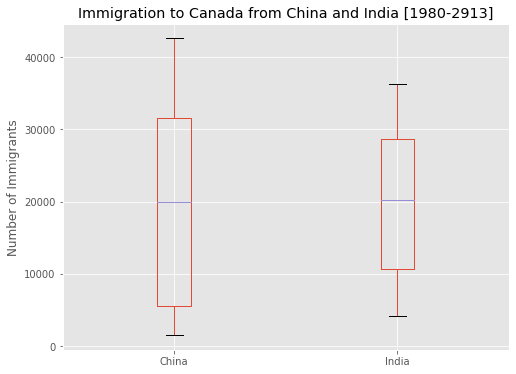

In [306]:
#Comparing the Immigration from China and India

df_CI= df_can.loc[['China','India'], years].transpose()

df_CI.plot(kind='box', figsize=(8,6))

plt.title("Immigration to Canada from China and India [1980-2913]")
plt.ylabel("Number of Immigrants")

plt.show()

In [307]:
df_CI.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


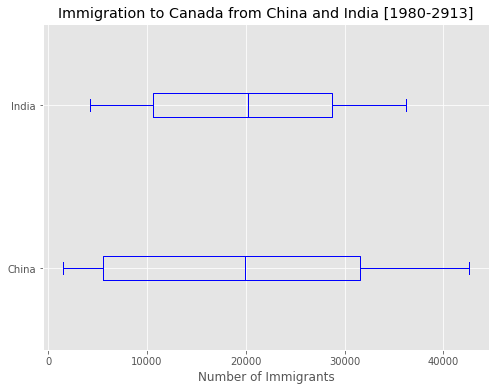

In [308]:
#Creating the horizontal plot for the previous case
df_CI= df_can.loc[['China','India'], years].transpose()

df_CI.plot(kind='box', figsize=(8,6), vert=False, color='blue')

plt.title("Immigration to Canada from China and India [1980-2913]")
plt.xlabel("Number of Immigrants")       #Here we have to swap the ylabel with the xlabel

plt.show()

## Creating the Subplots

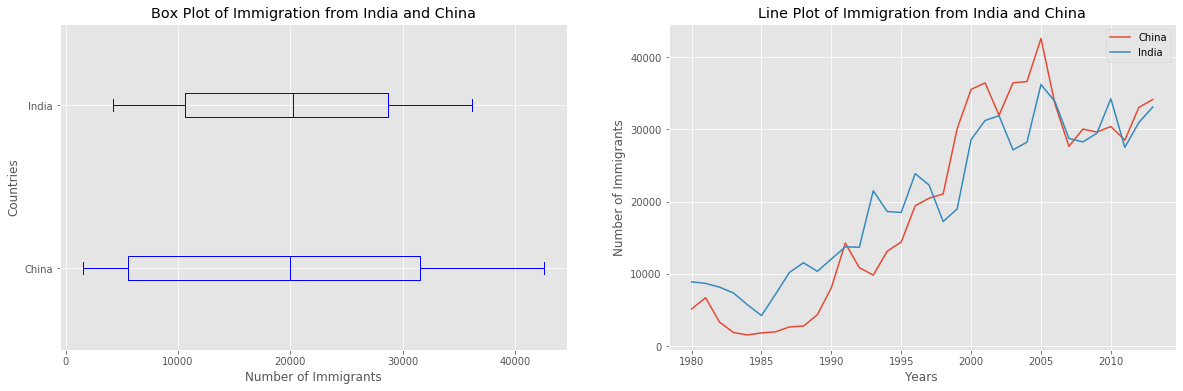

In [309]:
fig= plt.figure()

ax0= fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)

#Subplot1
df_CI.plot(kind='box',vert=False, color='blue', ax=ax0, figsize=(20,6))
ax0.set_title("Box Plot of Immigration from India and China")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

#Subplot2
df_CI.plot(kind='line', figsize=(20,6), ax=ax1)
ax1.set_title("Line Plot of Immigration from India and China")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of Immigrants")

plt.savefig("Comparison-Box-vs-Line.png")

plt.show()

### Plotting the immigration to Canada by decade 1980s, 1990s, 2000s

In [310]:
df_top15= df_can.sort_values(['Total'], ascending= False).head(15)
df_top15=df_top15[years].transpose()
df_top15.reset_index(inplace=True)
df_top15.rename(columns={"index": "Year"}, inplace=True)
df_top15['Year']=df_top15['Year'].map(int)

bins= np.array([1980,1990,2000,2010])
group_names= ["1980s", "1990s", "2000s"]

df_top15["Year_binned"]=pd.cut(df_top15["Year"], bins, labels= group_names, include_lowest=True)
df_top15.head()

,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania,Year_binned
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375,1980s
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438,1980s
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583,1980s
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,789,1490,2455,3404,543,1980s
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,1253,1169,2508,7583,524,1980s


In [311]:
df_top15.set_index('Year', inplace=True)
df_top15.index.name= None

In [312]:
df_top15=df_top15.groupby(['Year_binned']).sum()

In [313]:
df_top15.index.name= None
df_top15=df_top15.transpose()
df_top15

,1980s,1990s,2000s
India,94195,196926,309254
China,40079,188981,335247
United Kingdom of Great Britain and Northern Ireland,210839,239138,83297
Philippines,73273,136736,200758
Pakistan,13061,78232,119009
United States of America,82716,56456,77882
Iran (Islamic Republic of),25132,57100,67387
Sri Lanka,18321,72977,48019
Republic of Korea,18346,43720,66102
Poland,74642,49295,12953


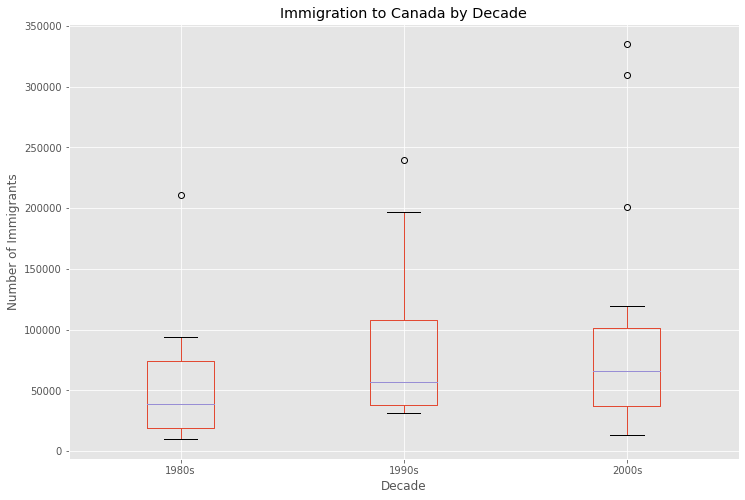

In [314]:
df_top15.plot(kind='box', figsize=(12,8))

plt.title("Immigration to Canada by Decade")
plt.ylabel("Number of Immigrants")
plt.xlabel("Decade")

plt.savefig("Immigration-to-Canada-by-Decade.png")

plt.show()

In [315]:
df_top15.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,52798.733333,86553.133333,98760.266667
std,51445.663486,69000.513277,102196.937343
min,9865.000000,31616.000000,12953.000000
25%,18830.000000,37723.000000,37306.500000
50%,38486.000000,56456.000000,66102.000000
75%,73957.500000,107484.000000,101153.000000
max,210839.000000,239138.000000,335247.000000
